In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('C:/Users/Omkar/Documents/Sem 1/Stats/new_final.csv')

In [4]:
categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()

from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

In [5]:
#way to split the data into labels and features
labels = df.target.values
df.drop(["target"],axis=1,inplace=True)
df=df.fillna(0)
features = df.values

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size=0.2,random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=20,max_leaf_nodes=5,random_state=42,criterion="gini")
rfc_model.fit(x_train,y_train)
y_pred = rfc_model.predict(x_test)

In [32]:
rfc_model.score(x_test,y_test)

0.9958433827679992

In [36]:
from sklearn.metrics import f1_score,accuracy_score,r2_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.9997513983840894
0.9997947349515062
0.9991532387747812


Text(0.5,1,'CONFUSION MATRIX')

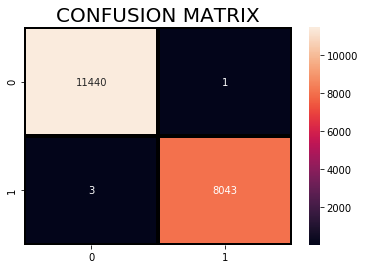

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

Text(0.5,1,'ROC - CURVE & AREA UNDER CURVE')

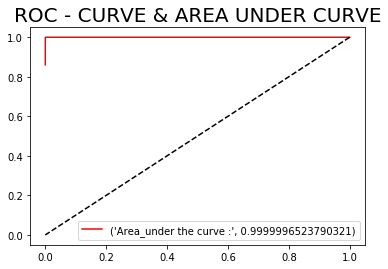

In [38]:
predicting_probabilites = rfc_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

In [34]:
feature_list = list(df.columns)

from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rfc_model.estimators_[7]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names=feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('C:/Users/Omkar/Documents/Sem 1/Stats/tree.png')